In [24]:
import pandas as pd
data_train = pd.read_table('D:\\www\\data\\Weibo Data\\Weibo Data\\weibo_train_data(new)\\weibo_train_data.txt',sep="\t",
header=None,encoding='utf-8')
#header=None:没有每列的column name，可以自己设定
#encoding='gb2312':其他编码中文显示错误
#delim_whitespace=True:用空格来分隔每行的数据
#index_col=0:设置第1列数据作为index
# data.head(1)
# data.info()
header = ['userId','weiboId','datetime','forward_count','comment_count','like_count','content']
data_train.columns = header
data_train.columns

Index(['userId', 'weiboId', 'datetime', 'forward_count', 'comment_count',
       'like_count', 'content'],
      dtype='object')

In [18]:
data_train.describe()

,forward_count,comment_count,like_count
count,1.225088e+06,1.225088e+06,1.225088e+06
mean,3.540621e+00,1.257382e+00,2.217098e+00
std,8.528489e+01,1.933314e+01,4.126350e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,1.000000e+00
max,4.185000e+04,7.467000e+03,1.187100e+04


In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225088 entries, 0 to 1225087
Data columns (total 7 columns):
userId           1225088 non-null object
weiboId          1225088 non-null object
datetime         1225088 non-null object
forward_count    1225088 non-null int64
comment_count    1225088 non-null int64
like_count       1225088 non-null int64
content          1225085 non-null object
dtypes: int64(3), object(4)
memory usage: 65.4+ MB


In [26]:
data_train.userId.describe()

count                              1225088
unique                               37251
top       875a4a77b339d93f819e2c4de5bd0b57
freq                                 31015
Name: userId, dtype: object

In [31]:
data.userId.value_counts().to_frame().describe()

,userId
count,37251.000000
mean,32.887386
std,238.967485
min,1.000000
25%,3.000000
50%,8.000000
75%,23.000000
max,31015.000000


In [39]:
'''
用户去重
'''
userId_sum = data.groupby(by="userId").sum()
userId_sum.to_excel(r'D:\\www\\data\\Weibo Data\\Weibo Data\\weibo_train_data(new)\\userId_sum.xls',sheet_name='Sheet1')

In [49]:
type(userId_sum)#pandas.core.frame.DataFrame
userId_sum.columns#Index(['forward_count', 'comment_count', 'like_count'], dtype='object')
userId_sum[userId_sum.forward_count==0].count()#25259
userId_sum[userId_sum.comment_count==0].count()#19877
userId_sum[userId_sum.like_count==0].count()#19303
userId_sum[userId_sum.forward_count==0][userId_sum.comment_count==0][userId_sum.like_count==0]#15366

d:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,forward_count,comment_count,like_count
userId,,,
000ce19d2fccb1f22421bec50bf25b08,0,0,0
000d7bf7406392b2212dfb4fe907d946,0,0,0
0015c42ec93854687a258a7f170c6acf,0,0,0
001d458a43e7fd1d9f8e2eba54d5d2fe,0,0,0
001fe802d7b8a3f5782b25acf0410440,0,0,0
00203b1aa005f8e374c1e681f5c2ba20,0,0,0
00212e7163d4aa64f2d7956a35027aa3,0,0,0
00218f81fb7713a915d74a1d44f95b0b,0,0,0
00235ea45eb587598e730a01e0c95435,0,0,0


In [55]:
'''
计算用户FCL均值 并输出
'''
userId_mean = data.groupby(by="userId").mean()
userId_mean.to_excel(r'D:\\www\\data\\Weibo Data\\Weibo Data\\weibo_train_data(new)\\userId_mean.xls',sheet_name='Sheet1')

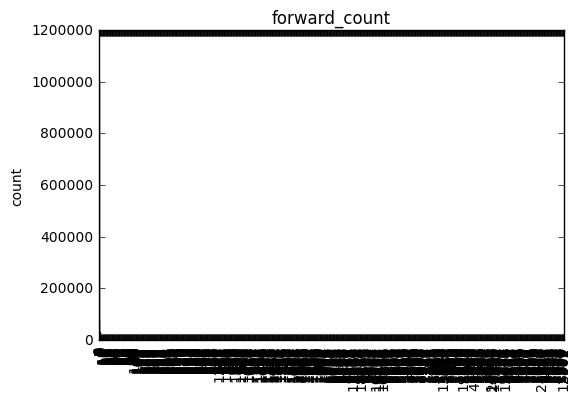

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
data_train.forward_count.value_counts().plot(kind='bar')
plt.title(u"forward_count") # 标题
plt.ylabel(u"count")
plt.show()

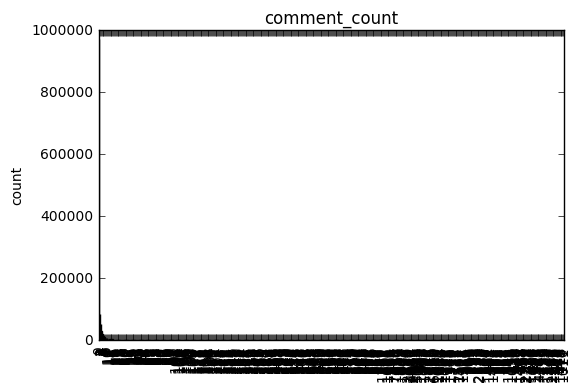

In [20]:
fig = plt.figure()
data_train.comment_count.value_counts().plot(kind='bar')
plt.title(u"comment_count") # 标题
plt.ylabel(u"count")
plt.show()

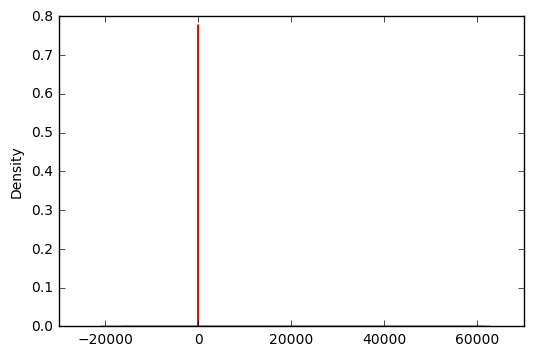

In [21]:
fig = plt.figure()
data_train.forward_count.plot(kind='kde')
data_train.forward_count[data_train.forward_count >3000].plot(kind='kde')
data_train.forward_count[data_train.forward_count < 100].plot(kind='kde')
# data_train.forward_count[data_train.forward_count == 3].plot(kind='kde')
plt.show()

In [4]:
data_groupby_userId = data_train.groupby(by='userId')
data_groupby_userId.count()

,weiboId,datetime,forward_count,comment_count,like_count,content
userId,,,,,,
000127c6126e2b0019f255ed21ac1cb7,2,2,2,2,2,2
0001565a5edece1669577e2ace9a6a3d,21,21,21,21,21,21
00033a6513b86b2705de9ffa9d37ffb6,58,58,58,58,58,58
0004fe2742507420eaa73e119dc83ac5,46,46,46,46,46,46
000c663a24a2f91f4ba156fcd4f8b9f2,122,122,122,122,122,122
000ce19d2fccb1f22421bec50bf25b08,1,1,1,1,1,1
000d7bf7406392b2212dfb4fe907d946,7,7,7,7,7,7
0012edb614365800e901c7f2b47e9129,7,7,7,7,7,7
001349a053bdecf1a71960f29288ced1,5,5,5,5,5,5


In [23]:
# 计算一下 总共有多少人发微博 即userid 数量
data_train.userId.value_counts().count()
# userid_counts = data.userId.value_counts()
# userid_counts
# userid_counts.count()
# # 同时也可以得出每个user 发的微博数量
# userid_counts
userid_counts_frame = userid_counts.to_frame()
userid_counts_frame.describe()

37251

In [17]:
forward_counts = data_train.forward_count.value_counts()
forward_counts.count

<bound method Series.count of 0        1005745
1          77348
2          31415
3          18198
4          12083
5           8835
6           6617
7           5452
8           4408
9           3679
10          3223
11          2832
12          2505
13          2163
14          2024
15          1886
16          1621
17          1521
18          1430
19          1278
20          1149
21          1096
22          1054
23           930
24           923
25           865
26           802
27           753
28           724
29           701
          ...   
522            1
1549           1
563            1
526            1
3635           1
562            1
561            1
2608           1
1584           1
559            1
1581           1
555            1
2600           1
5661           1
542            1
541            1
2588           1
2586           1
538            1
1561           1
1560           1
1559           1
1558           1
534            1
533            1
2579           1
5

In [122]:
# 垃圾用户
data[data.userId=='875a4a77b339d93f819e2c4de5bd0b57']

,userId,weiboId,datetime,forward_count,comment_count,like_count,content
14,875a4a77b339d93f819e2c4de5bd0b57,f2cdcdbcec9ff47cbb3c6a636e4b92a3,2015-07-01 04:11:48,0,0,0,#IT#【武汉一专车司机因毒驾被治安拘留】新华网武汉6月29日电(记者冯国栋)记者28日从武...
32,875a4a77b339d93f819e2c4de5bd0b57,c95cf3c7207594728f4662a9441e91f9,2015-05-13 02:58:26,0,0,0,#IT#【微商不是商业创新，只是渠道新增】不是他不想，而是有顾虑——珂兰钻石一直在进行新的资...
60,875a4a77b339d93f819e2c4de5bd0b57,dc51c745b7013ca0413ad37f37353037,2015-05-23 16:38:46,0,0,0,#IT#【美股评论：放弃电视苹果英明】导读：日前，有媒体报道称，苹果已经放弃了开发自己品牌电...
157,875a4a77b339d93f819e2c4de5bd0b57,0deaaeb11aef6d00b6c04f2a672537f1,2015-05-15 15:51:04,0,0,0,#IT#【国务院：实施弹性学制 允许留学籍休学创新创业】新华网北京5月13日电国务院办公厅日...
177,875a4a77b339d93f819e2c4de5bd0b57,8d673fce991ba1a88d24c02991d013eb,2015-03-04 07:55:06,0,0,0,#IT#【华为Watch上手玩：屏幕相当不错】华为此次在MWC2015上除了TalkBand...
178,875a4a77b339d93f819e2c4de5bd0b57,818cf3ce56612fdd0b6beca4bcff5521,2015-05-20 15:30:09,0,0,0,#IT#【谷歌牵头注资农业数据公司1500万美元】新浪财经讯北京时间5月19日晚间消息，美国...
216,875a4a77b339d93f819e2c4de5bd0b57,9074ad3623b856ca40b2b4c5ac5a1ad7,2015-07-06 04:14:49,0,0,0,#IT#【高校淘宝店“卖”大学毕业生引争议】2日，昆明学院校长何华在毕业典礼上向4000名师...
245,875a4a77b339d93f819e2c4de5bd0b57,b4a81c66934ed23b9a82d484088de9da,2015-07-16 13:21:09,0,0,0,#IT#【上半年工商部门受理网购投诉6万件】从消费者投诉的内容看，商品消费投诉量居前四位的是...
337,875a4a77b339d93f819e2c4de5bd0b57,e198924f21c8be6f913d07ec24fd3f04,2015-07-24 21:01:40,0,0,0,#IT#【电商频现价格乌龙 对症下药需补立法空白】实际上，电商平台出现价格乌龙的事件屡见不鲜...
339,875a4a77b339d93f819e2c4de5bd0b57,5f33a38bbd223a1f390af7fa8805ab26,2015-02-11 11:22:54,0,0,0,#IT#【爱奇艺等状告哔哩哔哩视频侵权 风投热情不减】但是对于资金并不充裕的B站来说，如何填...


In [123]:
data[data.userId=='0faddeeabf8b2cfd75afc6ad9c1ba2da']

,userId,weiboId,datetime,forward_count,comment_count,like_count,content
75,0faddeeabf8b2cfd75afc6ad9c1ba2da,3a085da8d3e3380b5e5eb8b517ad2f66,2015-04-01 17:26:25,0,0,0,"采用RAID-5容错控制,使用三块500GB SATA硬盘用于存储音频节...http://..."
152,0faddeeabf8b2cfd75afc6ad9c1ba2da,f48b107eb3d6d0addc759f78373026d7,2015-06-08 16:36:43,0,0,0,弥补内网安全管理体系的不足：http://t.cn/zj93IJ0
214,0faddeeabf8b2cfd75afc6ad9c1ba2da,0f8183b95eb81b416e1a778c01439116,2015-02-17 11:47:02,0,0,0,今日“110宣传日”公安派安全台历http://t.cn/RwM9sCu
420,0faddeeabf8b2cfd75afc6ad9c1ba2da,66a9f0f356ddc8704d36f8694e706020,2015-02-04 07:01:26,0,0,0,新兴际华集团向云南发放禁毒查缉单元设备，国有资产管理委员会http://t.cn/RZsBY...
533,0faddeeabf8b2cfd75afc6ad9c1ba2da,441274f67c188276c813dad287045bd5,2015-04-06 11:57:53,0,0,0,智能医疗板块上涨3.45%，宜通世纪等2股涨停http://t.cn/RA55KFH，诺贝尔...
584,0faddeeabf8b2cfd75afc6ad9c1ba2da,7439f149293bb556f9e15a5e49ebce33,2015-07-30 17:22:29,0,0,0,瞎掰移动设备的安全使用常识http://t.cn/zlF74FX，蒙古矿业半年亏损7821....
724,0faddeeabf8b2cfd75afc6ad9c1ba2da,5541122df454972c2bb784f6bd2c7211,2015-07-23 17:29:22,0,0,0,Security Short Take: Microsoft gets vague on W...
729,0faddeeabf8b2cfd75afc6ad9c1ba2da,2654961fca7310e65cde0a360491992c,2015-03-06 17:34:03,0,0,0,依法治国与信息安全管理制度http://t.cn/R7Mtp9J，收盘:美邦服饰涨5.66%...
738,0faddeeabf8b2cfd75afc6ad9c1ba2da,cd057d3b99b445fe2f2fb788f5a13894,2015-05-14 06:47:53,0,0,0,嘉兴市安监局依托政务云谋求信息化新发展，中国电子政务网http://t.cn/R2vQp0R
802,0faddeeabf8b2cfd75afc6ad9c1ba2da,6840ae898dd85eb775e994bb63c86830,2015-02-12 06:46:20,0,0,0,英唐智控:2014年年度报告披露提示性公告c-author


In [9]:
# 计算只有一条数据的用户数
userid_counts_frame = userid_counts.to_frame()
userid_counts_frame
# type(userid_counts_frame)
# userid_counts_frame.columns
# userid_counts_frame
# userid_counts_frame.columns = ['wbcount']
# userid_counts_frame[userid_counts_frame['wbcount']==1]
# len(userid_counts_frame[userid_counts_frame['wbcount']==1])

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [119]:
data_drop = data_train.userId.drop_duplicates()
data_drop
# type(data_drop)
# len(data_drop)

ValueError: Lengths must match to compare

In [78]:
value_counts.max

<bound method Series.max of 875a4a77b339d93f819e2c4de5bd0b57    31015
0faddeeabf8b2cfd75afc6ad9c1ba2da    17160
7511e346911dd7d1e38f11485abb25c5    12013
c35d635cd9d875e63fcaff8e4f1398a9     7875
c60533fdb5278412b14379f693f77dd5     7801
7e1580aec30f4a3cff7005500a0faa67     7394
06fb6ad865dca45a038508bf5f98e4e8     6453
9946867fb7e729d3d7b5693ebe4274cd     5472
7634e89faee952e49bfb983de1a6518c     5196
7c074e805ce31948c39178b9993e99a5     4902
0220afe08e008b01ad36cc916df43ace     4570
5e666401d93147eea9823d48d124fd34     4405
23316968cf27ff3d1fdb51cf149bdaca     3903
7564bab83ea84e4c0985b023aac58c7d     3682
f14abc57f4f844c195284f5842370a32     3230
25142383d6e0964c18ef86f27c5572d4     3219
8846c9bed09b6402880409f49db0b448     3095
c4b747dca344890718884e10805be401     3020
b2a945452f34cb65a30ad668d2640179     2917
aeb6d9fc9a5becaa329dfda898b18ae9     2906
25ca1cea6595c04a5f009a11dd0e676b     2859
61417b46222ee28b1f534d4e7b14ad89     2697
ac4e754e41c3f328f1bf18c7fc381511     2477
97d783

In [ ]:
value_counts